<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_binary_classification_single_neuron_single_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset_xa = np.linspace(1, 2, 50)
print(f'dataset_xa.shape = {dataset_xa.shape}')
dataset_ya = np.full(50, 0)

dataset_xb = np.linspace(2, 3, 50)
print(f'dataset_xb.shape = {dataset_xb.shape}')
dataset_yb = np.full(50, 1)

dataset_x = np.concatenate((dataset_xa, dataset_xb))
dataset_y = np.concatenate((dataset_ya, dataset_yb))

dataset_xa.shape = (50,)
dataset_xb.shape = (50,)


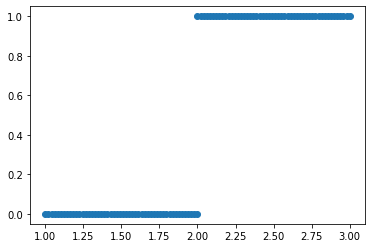

In [3]:
plt.scatter(dataset_x, dataset_y)
plt.show()

In [4]:
dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset =  pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(1.0, 0), (1.0204081632653061, 0), (1.0408163265306123, 0), (1.0612244897959184, 0), (1.0816326530612246, 0), (1.1020408163265305, 0), (1.1224489795918366, 0), (1.1428571428571428, 0), (1.163265306122449, 0), (1.183673469387755, 0), (1.2040816326530612, 0), (1.2244897959183674, 0), (1.2448979591836735, 0), (1.2653061224489797, 0), (1.2857142857142856, 0), (1.3061224489795917, 0), (1.3265306122448979, 0), (1.346938775510204, 0), (1.3673469387755102, 0), (1.3877551020408163, 0), (1.4081632653061225, 0), (1.4285714285714286, 0), (1.4489795918367347, 0), (1.4693877551020407, 0), (1.489795918367347, 0), (1.510204081632653, 0), (1.530612244897959, 0), (1.5510204081632653, 0), (1.5714285714285714, 0), (1.5918367346938775, 0), (1.6122448979591835, 0), (1.6326530612244898, 0), (1.6530612244897958, 0), (1.6734693877551021, 0), (1.693877551020408, 0), (1.7142857142857142, 0), (1.7346938775510203, 0), (1.7551020408163265, 0), (1.7755102040816326, 0), (1.7959183673469385, 0), (1.81632653

In [5]:
train_features = dataset_train.copy()
test_features = dataset_test.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

x = np.array(train_features['x'])

In [42]:
# model with a single neuron which has a single input
# a(x) = kx + b
activation_1 = None

num_of_classes = 2 # 0 and 1
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=activation_1),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.predict(x[:10])

array([[0.7865789 , 0.21342112],
       [0.8026489 , 0.19735108],
       [0.76679164, 0.23320831],
       [0.7976453 , 0.20235473],
       [0.80139375, 0.19860631],
       [0.8032484 , 0.19675164],
       [0.7798626 , 0.22013742],
       [0.80111504, 0.19888493],
       [0.79739   , 0.20261006],
       [0.80339664, 0.19660336]], dtype=float32)

In [44]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

# loss = 'binary_crossentropy'
loss = 'mean_squared_error'

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['binary_accuracy'])

In [45]:
%%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6.85 s, sys: 107 ms, total: 6.95 s
Wall time: 6.88 s


[array([[0.7479443]], dtype=float32), array([-0.9443264], dtype=float32)]


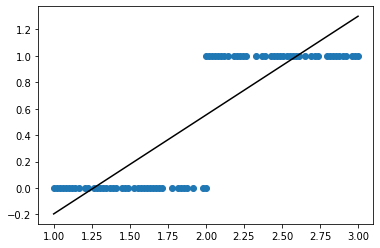

In [46]:
weights = model.layers[0].get_weights()
print(weights)
learned_coefficient = weights[0][0]
learned_bias = weights[1][0]

x = np.linspace(1, 3, 101)
y = learned_coefficient * x + learned_bias
plt.scatter(train_features['x'], train_labels, label='Data')
plt.plot(x, y, color='k', label='y=kx+b')

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,binary_accuracy,val_loss,val_binary_accuracy,epoch
95,0.250016,0.5,0.250014,0.5,95
96,0.250016,0.5,0.250013,0.5,96
97,0.250015,0.5,0.250012,0.5,97
98,0.250015,0.5,0.250011,0.5,98
99,0.250015,0.5,0.250011,0.5,99


In [12]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

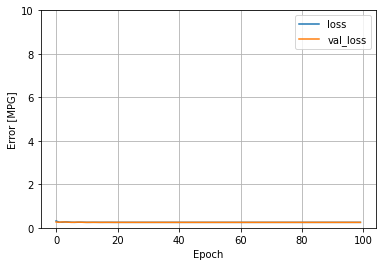

In [13]:
plot_loss(history)

In [47]:
x = np.linspace(1, 3, 101)
y = model.predict(x)
print(f'type(y) = {type(y)}') # numpy.ndarray
print(f'y.shape = {y.shape}')

type(y) = <class 'numpy.ndarray'>
y.shape = (101, 1)


In [48]:
def plot_fn(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

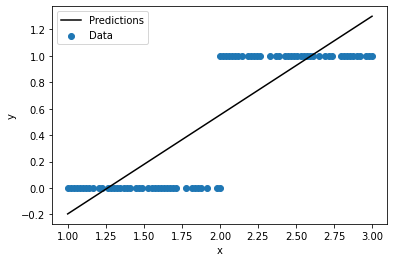

In [49]:
plot_fn(x,y)

In [50]:
# model with a single neuron which has a single input
# a(x) = kx + b

activation_1 = tf.nn.sigmoid # (case 3)

num_of_classes = 2 # 0 and 1
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=activation_1), 
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


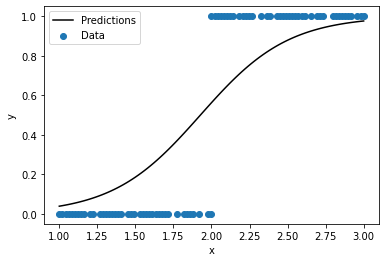

In [52]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

# loss = 'binary_crossentropy'
loss = 'mean_squared_error'

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['binary_accuracy'])

# %%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

x = np.linspace(1, 3, 101)
y = model.predict(x)

plot_fn(x,y)

In [53]:
# model with a single neuron which has a single input
# a(x) = kx + b
activation_1 = None
activation_2 = tf.nn.sigmoid

num_of_classes = 2 # 0 and 1
model = tf.keras.Sequential([
    layers.Dense(input_shape=[1,], units=1, activation=activation_1), 
    layers.Dense(units=num_of_classes, activation=activation_2),
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 4         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


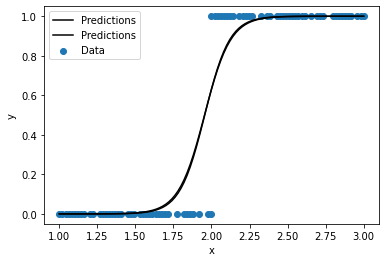

In [54]:
learning_rate = 0.1
optimizer=tf.optimizers.Adam(learning_rate=learning_rate)
# optimizer=tf.optimizers.SGD(learning_rate=learning_rate)

# loss = 'binary_crossentropy'
loss = 'mean_squared_error'

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['binary_accuracy'])

# %%time
history = model.fit(
    train_features['x'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


x = np.linspace(1, 3, 101)
y = model.predict(x)

plot_fn(x,y)